# 颜色过滤

In [27]:
import numpy as np
import cv2
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
src =  cv2.imread("../datas/grass-dirty.jpg");
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [29]:
hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)

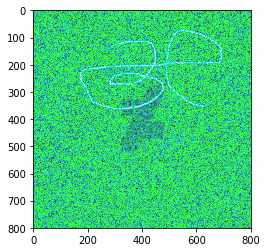

In [30]:
plt.imshow(hsv)

In [49]:
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]
# opencv 的H范围是0~180，红色的H范围大概是(0~8)∪(160,180)
idx = ((h < 8) & (h > 0)) | ((h > 120) & (h < 180))
h[idx] = 0
s[idx] = 0
v[idx] = 0

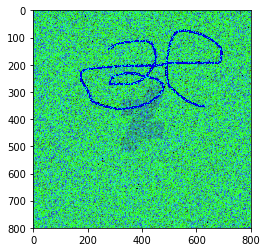

In [50]:
hsv_new = cv2.merge([h,s,v])
plt.imshow(hsv_new)

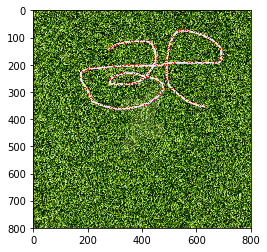

In [51]:
rgb_new = cv2.cvtColor(hsv_new,cv2.COLOR_HSV2RGB)
plt.imshow(rgb_new)

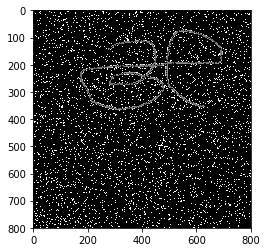

In [52]:
mask = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY) - cv2.cvtColor(rgb_new,cv2.COLOR_RGB2GRAY)
plt.imshow(mask,'gray')

In [65]:
mask = cv2.medianBlur(mask,5)

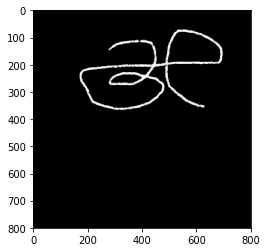

In [66]:
plt.imshow(mask,'gray')

In [67]:
dst1 = cv2.inpaint(rgb,mask,3,cv2.INPAINT_TELEA)

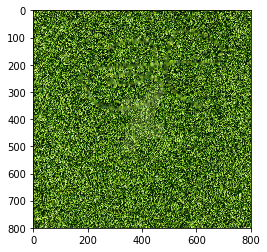

In [68]:
plt.imshow(dst1)

In [69]:
mask = cv2.GaussianBlur(mask,(5,5),2.4)

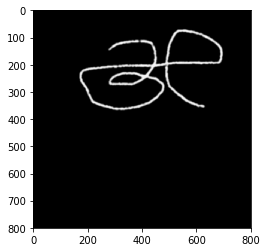

In [70]:
plt.imshow(mask,'gray')

In [71]:
dst2 = cv2.inpaint(rgb,mask,3,cv2.INPAINT_TELEA)

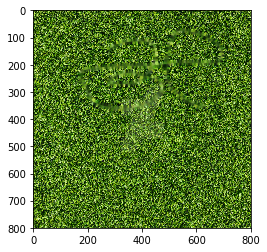

In [72]:
plt.imshow(dst2)